# Regression par processus gaussien


Nicolas Juillet & Joubine Aghili

**GdT ML-IRMA**, Mai 2021

# Plan
0. Généralités
1. Vecteurs et processus gaussien
2. Contexte, motivation et exemples jouets
3. Applications regression & classification

# Généralités



**"Déf:"** Une **variable aléatoire** $Z$ est une fonction définie sur un ensemble $\Omega$ qui à chaque éventualité $\omega\in \Omega$ associe un réel $Z(\omega)\in \mathbb{R}$. Plus précisément $\Omega$ est un *espace probabilisé* $(\Omega,\mathcal{A},\mathbb{P})$.

Autrement dit, $Z\in \mathcal{F}(\Omega, \mathbb{R})$. On peut aussi considérer $Z\in \mathcal{F}(\Omega, \mathbb{R}^n)$ ou $Z\in \mathcal{F}(\Omega, \mathbb{R}^I)\equiv \mathcal{F}(I\times\Omega, \mathbb{R})\equiv \mathcal{F}(I, \mathbb{R}^\Omega)$, etc.

**Déf:** L'éspérance d'une va réelle $Z$ est $\mathbb{E}(Z)=\int_\Omega Z(\omega)\ d\mathbb{P}(\omega)$ *(si cette intégrale est définie)*. 

Si $Z$ admet une densité $f:\mathbb{R}\to \mathbb{R}^+$ alors $\mathbb{E}(Z)= \int_{-\infty}^{+\infty} x f(x)dx$. 

*On peut voir $\mathbb{E}(Z)$ comme le centre de masse de la loi de $Z$.* 

**Déf:** 
- La **covariance** entre deux va $X,Y,$ est $\mathrm{Covar}(X,Y) = \mathbb{E}[(X - \mathbb{E}(X))(Y - \mathbb{E}(Y))]=\mathbb{E}(XY)-\mathbb{E}(X)\mathbb{E}(Y)$.
- La **variance** d'une va $Z$ est $\mathrm{Var}(Z)=\mathrm{Covar}(Z,Z)=\sigma_Z^2=\mathbb{E}[(Z-\mathbb{Z}(Z))^2]$.

La covariance est bi-linéaire. La variance est quadratique. L'*écart-type* $\sigma_Z=\sqrt{\mathrm{Var}(Z)}$ est positivement homogène. C'est un écart typique de $Z(\omega)$ au centre de masse $\mathbb{E}(Z)$.

## Lois

**Déf:** La loi de $Z$ est la mesure $A\subset \mathbb{R}\mapsto \mathbb{P}(\{Z^{-1}(A)\})$.

La loi de $Z\in \mathcal{F}(\Omega, \mathbb{R}^n)$ sera un mesure sur $\mathbb{R}^n$. Celle de $Z\in \mathcal{F}(\Omega, \mathbb{R}^I)$ sera un mesure sur $\mathbb{R}^I$.

**Déf:** On dit qu'une variable aléatoire $Z$ est *de loi normale d'espérance/moyenne $m$  et variance $\sigma^2>0$* si elle sa loi à pour densité $x\mapsto \frac{1}{\sigma\sqrt{2\pi}}\exp({-\frac{(x-m)^2}{2\sigma^2}})$ par rapport à la mesure de Lebesgue. 
On notera alors
$$ Z\sim \mathcal{N}(m,\sigma^2).$$
La loi de $Z$ est donc la mesure $\frac{1}{\sigma\sqrt{2\pi}}\exp({-\frac{(x-m)^2}{2\sigma^2}})dx$.


*Si $\sigma=0$ la variable aléatoire vaut constamment $m$*. Sa loi est $\delta_m$.

## Vecteur aléatoire

**Déf:** Un **vecteur aléatoire** est une fonction $Z=(Z_1,\ldots,Z_n): \Omega \to \mathbb{R}^n$, chaque composante $Z_i$ de $Z$ est une v.a.


**Déf:** L'**espérance d'un vecteur aléatoire** est alors le vecteur des espérances des composantes de $\mathbf{Z}$:

$$\mathbb{E}(\mathbf{Z}):= (\mathbb{E}(Z_1), \ldots, \mathbb{E}(Z_n)).$$


Soit $\lambda\in \mathbb{R}^n$. La variable aléatoire $\langle \lambda, Z\rangle=\sum^n \lambda_i Z_i$ a pour espérance $\sum \lambda_i \mathbb{E}(Z_i)$ et variance $\sum_{i,j}\lambda_i \lambda_j \mathrm{Covar}(Z_i,Z_j)$. Si $\lambda$ est unitaire, cela indique la dispertion de (la loi) de $Z$ dans la direction $\lambda$. On en déduit que 
la matrice $\left(\mathrm{Covar}(Z_i,Z_j)\right)_{i,j}$ est symétrique postive.

### Vecteur gaussien 

**Déf:** On dit qu'un vecteur aléatoire $\mathbf{Z}=(Z_1,\ldots,Z_n)$ est un **vecteur gaussien** si toute combinaison linéaire $\langle \lambda, Z\rangle$ de ses composantes est une va gaussienne.

*Remarque:* Si $Z$ est de moyenne $\mu\in \mathbb{R}^n$ et de covariance $\Sigma\in M_{n,n}(\mathbb{R})$ alors cette loi sera $\mathcal{N}(\lambda^T\mathbb{E}(Z),\lambda^T \Sigma \lambda)$.

**Prop:** Pour tout $\mu\in \mathrm{R}^n$ et $\Sigma$ symétrique positive il existe un vecteur gaussien de moyenne $\mu$ et covariance $\Sigma$.


**Déf:** On dit qu'un vecteur aléatoire $\mathbf{Z}=(Z_1,\ldots,Z_n)$ suit une loi normales multidimensionnelle $\mathcal{N}(\mu,\Sigma)$ si il admet une densité $f:\mathbb{R}^n\to \mathbb{R}^+$ de la forme: 

$$(x_1,\ldots,x_n)\mapsto\frac{1}{(2\pi)^{\tfrac{n}{2}} \sqrt{\det(\Sigma)}}\exp\left(-\tfrac{1}{2}(\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1} (\mathbf{x}-\mathbf{\mu}) \right).$$

*NB: ici $\Sigma$ est inversible!*

**Prop:** Les vecteurs gaussiens dont la covariance $\Sigma$ est inversible sont exactement les loi normales multidimensionnelles de type $\mathcal{N}(\mu,\Sigma)$.

**Prop:** Plus généralement si $\mathbf{Z}$ est un vecteur gaussien, alors sa loi est entièrement caractérisé par sa moyenne $\mathbf{\mu}=\mathbb{E}(\mathbf{Z})$ et sa matrice de coviariance

$$ 
\Sigma = 
\begin{pmatrix} 
Var(Z_1)   & \cdots & Cov(Z_1,Z_n) \\
             & ...     &              \\
Cov(Z_n,Z_1) &         & Var(Z_n)
\end{pmatrix} = (Cov(Z_i,Z_j))_{ij}
$$


*Exemple: $(Z_1,Z_2)\sim \mathcal{N}\left((y_1,y_2),\left(\matrix{\sigma^2&a\\ a& \sigma^2}\right)\right)$.*

**Simulation**

**Prop:** Soit $\mathbf{Z}=\mu+A\cdot \mathbf{X}$ un vecteur gaussien avec $\mathbf{X} \sim \mathcal{N}(\mathbf{0}, I_n)$ *(correspond exactement à $X_1,\ldots,X_n$ iid de loi $\mathcal{N}(0,1)$)*, on a alors 
- $Z$ est un vecteur gaussien
- $\mathbb{E}(\mathbf{Z})=\mu$,
- $\mathrm{Covar}(Z)=AA^T$.

Pour faire simple, on peut donc supposer qu'un vecteur gaussien est un vecteur aléatoire $\mathbf{Z}$ qui s'écrit

$$ \mathbf{Z} = \mathbf{\mu} + A \mathbf{X},$$
avec $X$ un vecteur aléatoire où chaque $X_i\sim \mathcal{N}(0,1)$ indépendantes. Cela sert notamment pour la simulation



#### Conditionnement

Soit $Z_a$ et $Z_b$ deux vecteurs gaussiens à valeur dans $\mathbb{R}^d$ et $\mathbb{R}^{n-d}$ tels que $(Z_a,Z_b)\sim \mathcal{N}(m,\Sigma)$ avec 

$$ m = \begin{pmatrix} m_a \\ m_b \end{pmatrix}, \quad \Sigma = \begin{pmatrix} \Sigma_{11} & \Sigma_{12}\\ \Sigma_{12}^t & \Sigma_{22}\end{pmatrix},$$

alors $$Z_b|Z_a=(y_1,\ldots,y_d) \sim \mathcal{N}(m^\star, \Sigma^\star)$$ 

où
$$m^\star = m_b + \Sigma_{12}^t \Sigma_{11}^{-1}(Z_a-m_a), \quad \Sigma^\star=\Sigma_{22}-\Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12}$$

**Processus gaussien**

**Déf:** Un *Processus Gaussien* est une famille $\mathscr{F}=(Z_x)_{x\in I}$ de variables aléatoires telle que (pour tout $n\in \mathbb{N}^*$ et tout vecteur $(x_1,\ldots,x_n)\in \mathbb{R}^n$) la loi jointe de toute sous famille finie $(Z_{x_1},\ldots,Z_{x_n})\subset \mathscr{F}$ de v.a. est gausienne.

**Thém:** Pour toute famille $(\mu_x)_{x\in I}$ et toute "matrice" symétrique positive $(\Sigma_{x,y})_{x,y\in I}$ il existe un processus gaussien dont les lois fini-dimensionnelles sont les vecteurs gaussiens correspondant à **$\mu$** et **$\Sigma$**.

**Déf:** On peut aussi voir $Z$ comme une fonction aléatoire $Z:I\to \mathcal{F}(\Omega, \mathbb{R})$.

Certains théorèmes stipulent que sous certaines conditions concernant $\Sigma$, la "fonction aléatoire" $Z(\omega):x\in I\to \mathbb{R}$ est continue pour $\mathbb{P}$-presque tout $\omega\in \Omega$.

**Déf:** Les processus gaussien $W$ dont la matrice de covariance est diagonale sont appelées "bruit blanc". Les variables aléatoires $(W_x)_{x\in I}$ sont alors normales $\mathcal{N}(\mu_x, \Sigma_{x,x})$ et indépendantes.

*Remarque:* 
- Sommer des processus aléatoires indépendants $Z$ et $W$ reviens à sommer leur espérance et sommet leur matrices de covariances. 
- En sommant le bruit blanc on pert la continuité!

# Contexte et motivations

## But

**Regression/Classification**: Approcher un modèle latent $f:X\to Y$ dont on ne possède que des données entrée/sortie $((x_i), (y_i))_{1\le i \le N}$ 

<center><img src="model_data.png"/ width="800"></center>

NB: On parle aussi de *métamodélisation* (modèle d'un modèle).

## Techniques connues

- Régression linéaire,
- régression polynomiale,
- réseaux de neurones,
- (...)
- par **Processus Gaussien (PG)**.

### Réalisation d'un vecteur gausien $Z$

Pour construire un vecteur gaussien $Z$, on peut alors
- choisir des points $x_1,\ldots,x_n$
- choisir un noyau de corrélation $k$ et une fonction moyenne $m$
- construire un vecteur moyenne $\mathbf{m}$ tq $m_i=m(x_i)$
- construire $\Sigma=(k(x_i,x_j))$
- construire $A$ tel que $\Sigma=AA^T$
- $Z=\mathbf{m} + A \mathbf{U}$ avec $\mathbf{U}\sim \mathcal{N}(0, I_n)$

**Exemple**:
- $x_1,\ldots,x_n$ equidisanced points in $[-5,5]$
- $k(x_i,x_j)=\sigma^2\exp\left(-\tfrac{(x_i-x_j)^2}{2\ell^2}\right)$
- $\mu_i=m(x_i)=\sin(x_i)$

In [1]:
import demo

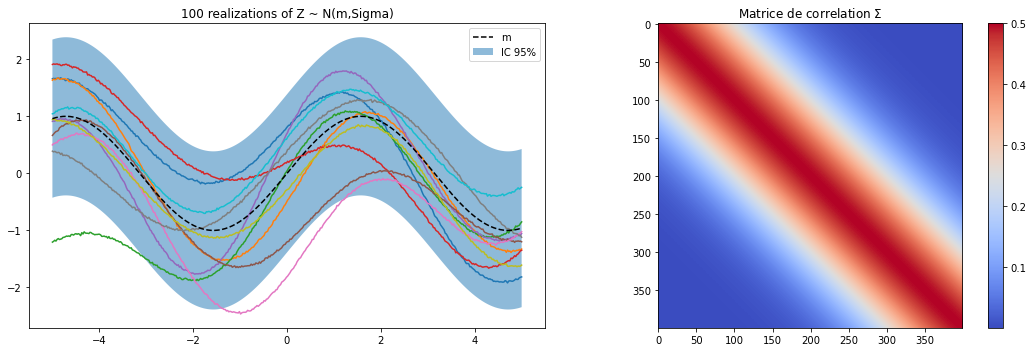

In [9]:
import demo
demo.plotZ(a=-5,b=5, sig=0.5, l=1.5, noise=0.0001, n_plot=10, n_shots=100) 

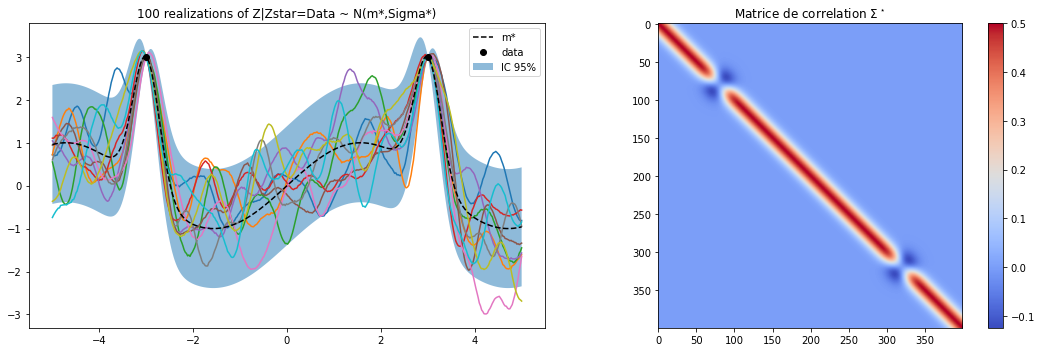

In [29]:
demo.plotZ(a=-5,b=5, sig=0.5, l=0.2, noise=0.0001, n_plot=10, n_shots=100, withX=[(3,3),(-3,3)])

#### Entrainement d'un Processus Gaussien

Hyperparamètres :
$$\theta=(\sigma, \ell, \sigma_{\text{bruit}})$$
où
- écart type $\ell$  et variance du noyau $k$
- rajout de bruit $\sigma_{\text{bruit}}$ tq $\Sigma+\sigma_{\text{bruit}}^2\cal{N}(0,I_n)$

NB: Il est aussi possible de paramétrer la moyenne $m$.

$\to$ Maximisation de la log-vraisemblance $p(\theta|Z_1, Z_2)$ :

$$ \mathcal{L}(\theta):= -\log(p(Z_2|Z_1,\theta)) - \log(p(\theta)) \longrightarrow \min$$

# Exemples avec `sklearn`

## Librairies pour les PG

- **sklearn** 
- PyMC3 http://docs.pymc.io/
- GPFlow https://github.com/GPflow/GPflow
- PyGP https://pythonhosted.org/pygp/

## Exemple de regression (diabètes)

In [13]:
from sklearn import datasets
print(datasets.load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [1]:
import pandas as pd
pd.read_csv('diabetes.txt', delimiter = "\t")

AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

In [3]:
# Données SciKit Learn (recentrées)
import demo2
x_train, y_train, x_test, y_test, maxy = demo2.init_data(normalize=True)

X min=-0.137767225690012 max=0.198787989657293
y min=0.07225433526011561 max=1.0
total sample:  442
training sample:  402
test sample:  40


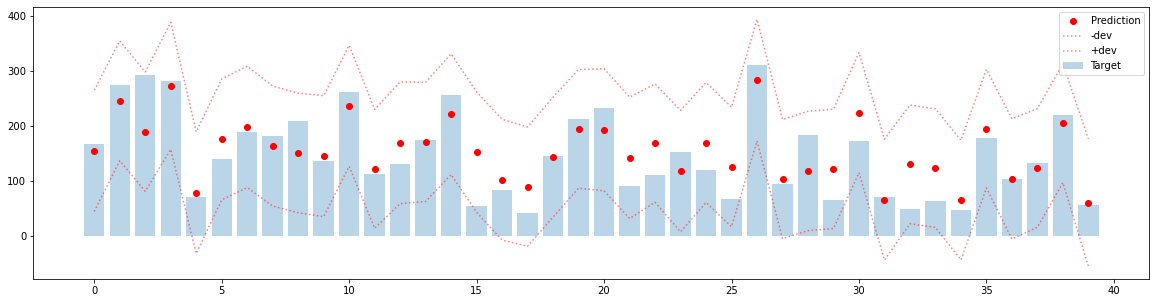

In [2]:
params = demo2.GP_predict(x_train, y_train, x_test, y_test, maxy)

## Exemple de classification d'images 

1797 images de tailles 8x8


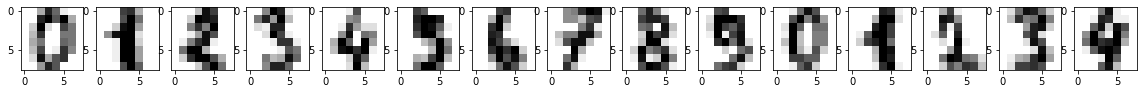

In [46]:
from sklearn.gaussian_process import GaussianProcessClassifier # au lieu de GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel, Matern, ConstantKernel as C
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

digits = datasets.load_digits() 
n_sample, sx, sy = digits.images.shape

# plot first 15 pictures
n_img = 15
fig, axs = plt.subplots(1,n_img, figsize=(20,5))
for i in range(n_img):
    axs[i].imshow(digits.images[i,:,:], cmap='binary')
print('{} images de tailles {}x{}'.format(n_sample, sx, sy))

## Entrainement du modèle

In [43]:
n_train = 800
assert n_sample > n_train
n_test = n_sample - n_train

print('no. total sample: ', n_sample)
print('no. training sample: ', n_train)
print('no. test sample: ', n_test)

# préparer les données
input_train = digits.images[:n_train]  # extrait les n_train premières valeurs (800, 8, 8)
output_train = digits.target[:n_train]
input_test = digits.images[n_train:]
output_test = digits.target[n_train:]

# Observations
X = input_train.reshape(n_train, sx*sy)  # on transforme (800, 8x8)
y = output_train

kernel = 1.0 * RBF(8.0, (1e-3, 1e3)) # length scale l, length scale bounds
gp = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=9) # optimiseur BFGS
gp.fit(X, y)

no. total sample:  1797
no. training sample:  800
no. test sample:  997


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=8),
                          n_restarts_optimizer=9)

In [47]:
# Prédiction 
x_pred = input_test.reshape(n_test,sx*sy)
y_pred = gp.predict(x_pred)

error = np.linalg.norm(y_pred-output_test)/n_test

# Check
succeed = np.count_nonzero((np.abs(output_test - y_pred) < 1.0))
print('Success : {}/{}, {:.2f}%'.format(succeed, n_test, succeed/n_test*100))

Success : 947/997, 94.98%


# Références
1. [Gaussian Processes for ML, C.E. Rasmussen](http://www.gaussianprocess.org/gpml/chapters/RW.pdf)
2. [Un exemple SKlearn](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html)
3. [D. Duvenaud's PhD thesis](https://www.cs.toronto.edu/~duvenaud/thesis.pdf)
4. [Métamodélisation par PG en pratique : site de Kurchatov, A. Marrel PhD thesis](http://www2.agroparistech.fr/IMG/pdf/Marrel.pdf)